# Tasks

* Create a random erdos-renyi graph with 100 nodes and a edge probability of 0.3
* Plot the degree_centrality distribution (a histogram of the degree centrality values).
* Change the edge probability of the erdos-reyni graph to 0.6 and plot the degree centrality distribution again.
* Infer the changes in the plots, why does the degree centrality distribution change. Create a markdown cell in the jupyter notebook and write what you can infer from the plots.
* Create a random barabasi_albert_graph with 100 nodes and attach 3 edges to a new node in the graph (m=3).
* Plot the degree_centrality distribution (a histogram of the degree histogram).
* Infer the changes in the plots, why does the degree centrality distribution change between these 2 random graph generators 
* Create a markdown cell in the jupyter notebook and write what you can infer from the plots.

# Import Libraries

In [41]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Plotting graphs

Creating a function that plots the histogram of the degree distribution in the graph. First, we store the degree of all nodes. Then, using the matplotlib histogram function, we plot the histogram distribution.

In [42]:
def create_and_plot_graph(G,prob='NA'):
    deg = [d for n,d in G.degree()]
    first_edge, last_edge = np.min(deg), np.max(deg)
    n, bins, patches = plt.hist(x=deg, bins=20, color='#0504aa', alpha=0.7, rwidth=0.75)
#     plt.xlim([first_edge-1, last_edge+1])
    plt.xlim([0,100])
    plt.title(str(G)+' probability: '+str(prob))
    plt.ylabel('# of nodes')
    plt.xlabel('Degree')
    plt.grid('on')
    plt.show()

## Erdos-Renyi Graph

Erdos-Renyi algorithm is a random graph generator. The graphs generated are chosen only if the edge probability is higher than a certain specified value. Higher the probability, more the number of edges. 
$G(n,p)$ is the graph where $n$ is the number of nodes in the graph, and $p$ is the edge probability.

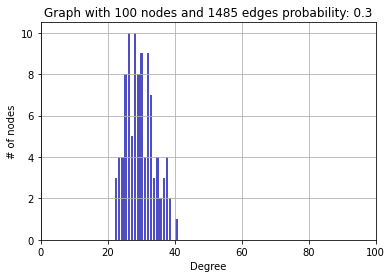

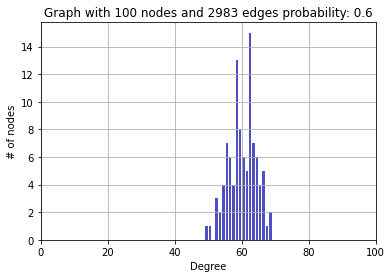

In [43]:
# Creating an erdos-renyi graph or a #binomial graph with 100 nodes and edge-probability distribution of 0.3
G = nx.erdos_renyi_graph(100,0.3,seed=4812)
create_and_plot_graph(G,0.3)
# Creating an erdos-renyi graph with 100 nodes and an edge probability of 0.6
G2=nx.erdos_renyi_graph(100,0.6,seed=4812)
create_and_plot_graph(G2,0.6)

### Inference
The higher the probability parameter, the more the number of edges are generated. Hence, even though the number of nodes remain the same, the edges generated when the probability is 0.6 is more in number. 
The expected degrees of the graphs would be $n*p$, where $n$ is the number of nodes and $p$ is the edge-probability. Hence, in the case $p=0.3$, the expected degree of the nodes is $\approx30$. On performing a similar analysis in the case where $p=0.6$, the expected degree of the nodes is $approx60$. 
The clustering of the degrees around the expected probabilities can be observed from the degree centrality distribution as well. 

## Barabasi Albert Graph

Barabasi-Albert algorithm generates graphs based on a preferential attachment. New nodes attach to existing nodes that have higher existing connections. It is one of the most popular random graph generator algorithms for scale-free networks.
$G(n,m)$ where $n$ is the number of nodes and $m$ is the number of edges that connect a new node with existing nodes.

In [ ]:
# Visualizing how the barabasi albert graph grows
gs1 = nx.star_graph(3)
nx.draw(gs1,pos=nx.circular_layout(gs1),with_labels=True)
plt.show()
#Creating a random graph with 8 nodes and 3 edges
Gb1 = nx.barabasi_albert_graph(8,3,seed=7)
nx.draw(Gb1,pos=nx.circular_layout(Gb1),with_labels=True)
plt.show()
# Initial graph when adding an extra node
Gb2 = nx.barabasi_albert_graph(9,3,seed=7,initial_graph=Gb1)
nx.draw(Gb2,pos=nx.circular_layout(Gb2),with_labels=True)
plt.show()
# No intial graph when adding an extra node
gs2 = nx.barabasi_albert_graph(9,3,seed=7)
nx.draw(gs2,pos=nx.circular_layout(gs2),with_labels=True)
plt.show()


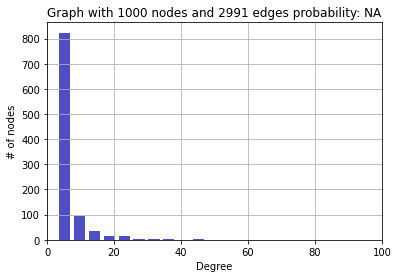

In [45]:
G3 = nx.barabasi_albert_graph(1000,3,seed=4182)
create_and_plot_graph(G3)

### Inference
The degree centrality distribution in graphs generated by Barabasi-Albert algorithm follow the *power-law distribution*. This is expected since the preferential attachment rule ensures that new nodes connect to existing nodes that are highly connected.

## Comparison between the 2 algorithms
The **Erdos-Renyi** algorithm generates random graphs that ensure that the degree of the nodes can be manipulated by fixed an edge probability. The edge probability dictates the probability of an edge existing between 2 nodes. The degree of the nodes tend to cluster around $n*p$ where $n$ is the number of nodes and $p$ is the edge probability.
     $\newline$
On the other hand, **Barabasi-Albert** algorithm is a scale-free algorithm whose degree distribution follows power-law. New nodes preferentially attach themselves to existing nodes that show a high degree. Hence, the number of nodes that show a very high degree are few in number.